## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

# Scaling modules
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# Ensures the same random data is used each time you execute the code
np.random.seed(0)


In [2]:
# Load the countries data
countries = pd.read_csv("countries.csv")

countries.head()


,Country,Country Groups,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,FP.CPI.TOTL.ZG,IT.CEL.SETS.P2,IT.NET.USER.ZS,NE.EXP.GNFS.ZS,...,NY.GDP.PCAP.CD,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.GROW,SP.URB.TOTL.IN.ZS
0,CEB,Central Europe and the Baltics,1.555790,100.000000,14.538355,6.820042,1.840965,122.192106,58.599297,52.333390,...,12567.128310,77.039930,189.578062,10.543330,11.429917,6.019183,75.295349,1.465325,-0.362710,62.059417
1,CSS,Caribbean small states,4.658176,93.114511,9.096342,9.277109,3.250344,113.628492,35.407690,44.935642,...,8726.326154,121.928584,200.568068,17.555646,7.436407,18.406085,72.252392,2.151960,0.642147,42.083135
2,EAP,East Asia & Pacific (excluding high income),3.796483,94.997330,16.471817,5.106045,3.789836,69.905604,28.957482,30.572597,...,4007.323783,91.717833,134.835195,14.439063,7.019396,19.100000,73.482345,1.843869,0.713160,47.696831
3,EAR,Early-demographic dividend,2.073571,79.455104,26.481427,2.119827,4.580200,68.069446,12.835425,27.711023,...,2926.483907,150.595639,214.978616,22.914627,7.028941,40.042149,67.955732,2.763140,1.534541,42.113134
4,EAS,East Asia & Pacific,2.930966,95.496185,13.729447,5.701783,3.247588,73.657018,34.269800,32.153225,...,7674.475705,86.702958,130.465277,13.880915,7.095146,18.136433,74.383915,1.797065,0.675231,51.791229


#### Visualise the IT.CEL.SETS.P2 feature

<Axes: xlabel='IT.CEL.SETS.P2', ylabel='Count'>

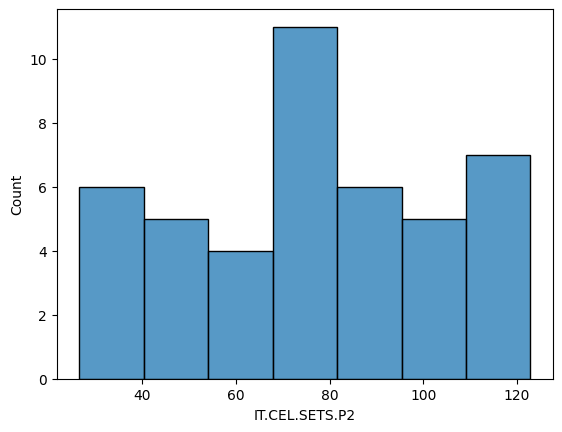

In [3]:
# IT.CEL.SETS.P2 is the mobile cellular subscriptions per 100 people.
sns.histplot(countries['IT.CEL.SETS.P2'])

#### Normalise the IT.CEL.SETS.P2 feature

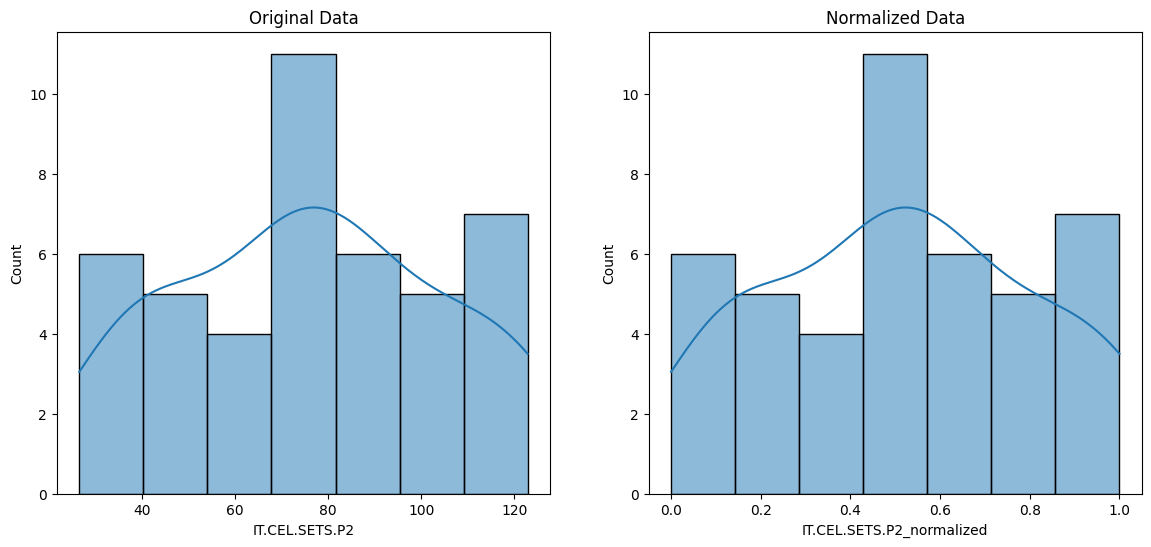

In [4]:
# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Extract and reshape the data to be 2D
data_to_normalize = countries[['IT.CEL.SETS.P2']].values

# Fit the scaler to the data and transform it
normalized_data = scaler.fit_transform(data_to_normalize)

# Assign the normalized data back to the DataFrame
countries['IT.CEL.SETS.P2_normalized'] = normalized_data

# Plot the original and normalized data to compare
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original Data
sns.histplot(countries['IT.CEL.SETS.P2'], ax=ax[0], kde=True)
ax[0].set_title("Original Data")

# Normalized Data
sns.histplot(countries['IT.CEL.SETS.P2_normalized'], ax=ax[1], kde=True)
ax[1].set_title("Normalized Data")

plt.show()


Text(0, 0.5, 'Country count')

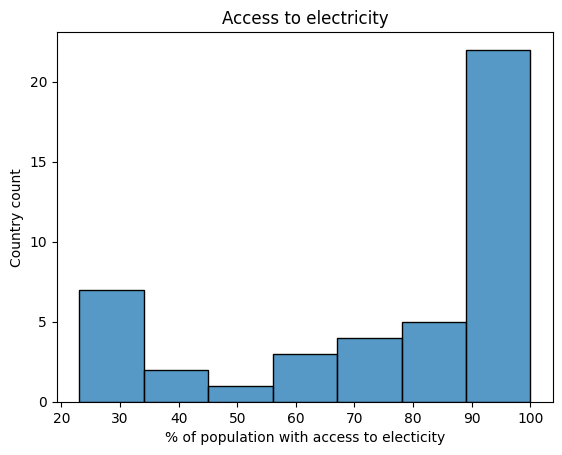

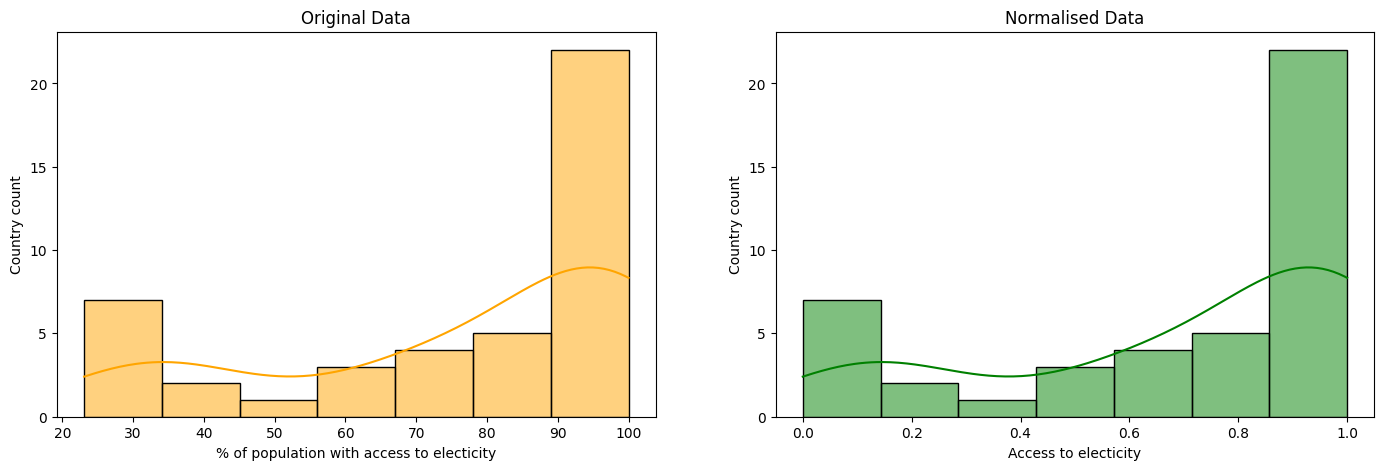

In [5]:
# From the countries dataset, visualise the "EG.ELC.ACCS.ZS" column using a histogram
sns.histplot(countries['EG.ELC.ACCS.ZS'])
plt.title('Access to electricity')
plt.xlabel('% of population with access to electicity')
plt.ylabel('Country count')


# Scale the column
scaler = MinMaxScaler()
data_to_normalise = countries[['EG.ELC.ACCS.ZS']].values
normalise_data = scaler.fit_transform(data_to_normalise)

# Assign the normalised data to DataFrame
countries['EG.ELC.ACCS.ZS_normalised'] = normalise_data

# Visualise the original and scaled data alongside each other.
fig, ax = plt.subplots(1, 2, figsize=(17, 5))

sns.histplot(countries['EG.ELC.ACCS.ZS'], ax=ax[0], kde=True, color='orange')
ax[0].set_title("Original Data")
ax[0].set_xlabel('% of population with access to electicity')
ax[0].set_ylabel('Country count')


sns.histplot(countries['EG.ELC.ACCS.ZS_normalised'], ax=ax[1], kde=True, color='green')
ax[1].set_title("Normalised Data")
ax[1].set_xlabel('Access to electicity')
ax[1].set_ylabel('Country count')

#    Note EG.ELC.ACCS.ZS is the percentage of the population with access to electricity.